### Kết nối lên mySQL

In [67]:
import pymysql
import pandas as pd
import os  
from dotenv import load_dotenv

In [73]:
load_dotenv()

True

In [74]:
# Lấy thông tin kết nối từ biến môi trường
db_host = os.getenv("DB_HOST")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = int(os.getenv("DB_PORT")) 
db_name = os.getenv("DB_NAME")

timeout = 10

In [75]:


connection = pymysql.connect(
    charset="utf8mb4",
    connect_timeout=timeout,
    cursorclass=pymysql.cursors.DictCursor,
    db=db_name,
    host=db_host,
    password=db_password,
    read_timeout=timeout,
    port=db_port,
    user=db_user,
    write_timeout=timeout,
)

cursor = connection.cursor()


cursor.execute("""
show databases;
""")

# Lệnh SQL
# code_sql = "CODE SQL HERE"
# cursor.execute(code_sql)
cursor = connection.cursor()

#---Lệnh SQL
cursor.execute("use defaultdb")
#cursor.execute("""update weather set column = value where condition""")
#cursor.execute("""insert into weather (column1, column2,...) values (value1, value2, value3)""")
#cursor.execute("""update weather set column1 = value1, column2 = value2,... where condition""")
cursor.execute("select * from weather")
result = cursor.fetchall()
df_weather = pd.DataFrame(result)


In [44]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           20 non-null     int64 
 1   year         20 non-null     int64 
 2   temperature  20 non-null     object
 3   humidity     20 non-null     object
 4   rain         20 non-null     object
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes


Nhận thấy temperature, humidity, rain đều đang ở dạng object nên chúng ta sẽ convert nó sang floa


In [45]:
col_to_convert = ['temperature','humidity','rain']
for col in col_to_convert: 
    df_weather[col]= pd.to_numeric(df_weather[col], errors= 'coerce')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20 non-null     int64  
 1   year         20 non-null     int64  
 2   temperature  20 non-null     float64
 3   humidity     20 non-null     float64
 4   rain         20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 932.0 bytes


In [46]:
df_weather.describe()

,id,year,temperature,humidity,rain
count,20.00000,20.00000,20.00000,20.000000,20.000000
mean,10.50000,2014.50000,22.37550,82.157500,2157.805000
std,5.91608,5.91608,0.47458,1.431774,325.820279
min,1.00000,2005.00000,21.57000,80.080000,1634.100000
25%,5.75000,2009.75000,21.98750,81.040000,1895.250000
50%,10.50000,2014.50000,22.38500,82.375000,2144.950000
75%,15.25000,2019.25000,22.66250,83.042500,2353.100000
max,20.00000,2024.00000,23.34000,84.830000,2725.400000


In [47]:
df_weather[['temperature', 'humidity', 'rain']].corr()

,temperature,humidity,rain
temperature,1.000000,-0.681719,-0.280799
humidity,-0.681719,1.000000,-0.118069
rain,-0.280799,-0.118069,1.000000


Nhiệt độ (temperature): Nhiệt độ trung bình có vẻ khá ổn định, dao động trong khoảng hẹp (từ ~21.5°C đến ~23.3°C). Điều này cho thấy nhiệt độ trung bình hàng năm không có biến động quá lớn trong 20 năm qua.

Độ ẩm (humidity): Độ ẩm luôn ở mức cao, dao động từ khoảng 80% đến 84%. Điều này gợi ý rằng đây là dữ liệu từ một khu vực có khí hậu ẩm ướt. Độ lệch chuẩn thấp, cho thấy sự ổn định.

Lượng mưa (rain): Đây là biến số thú vị nhất. Lượng mưa có biến động rất lớn qua các năm. Ví dụ, năm 2018 (1645.0) có lượng mưa thấp hơn đáng kể so với năm 2012 (2457.7) hay 2016 (2725.4). Điều này cho thấy lượng mưa hàng năm không ổn định và có thể bị ảnh hưởng bởi nhiều yếu tố khác nhau (như các hiện tượng El Niño/La Niña).

Nhiệt độ và độ ẩm tương quan nghịch : -0.68. Điều này cho thấy khi nhiệt độ trung bình tăng lên thì độ ẩm trung bình giảm xuống và ngược lại. Điều này có thể do nhiệt độ khô nóng thì trời ít mây hơn, thời tiết khô ráo hơn, dẫn đến độ ẩm trung bình thấp. 

Lượng mưa và độ ẩm hầu như không tương quan : -0.11.  Mối tương quan này là không đáng kể. Số liệu cho thấy độ ẩm luôn giữ ở mức ổn định cho dù lượng mưa có biến đổi, điều này chỉ ra rằng khu vực này luôn có độ ẩm cao, do đó nó không còn là yếu tố quyết định đến lượng mưa. 

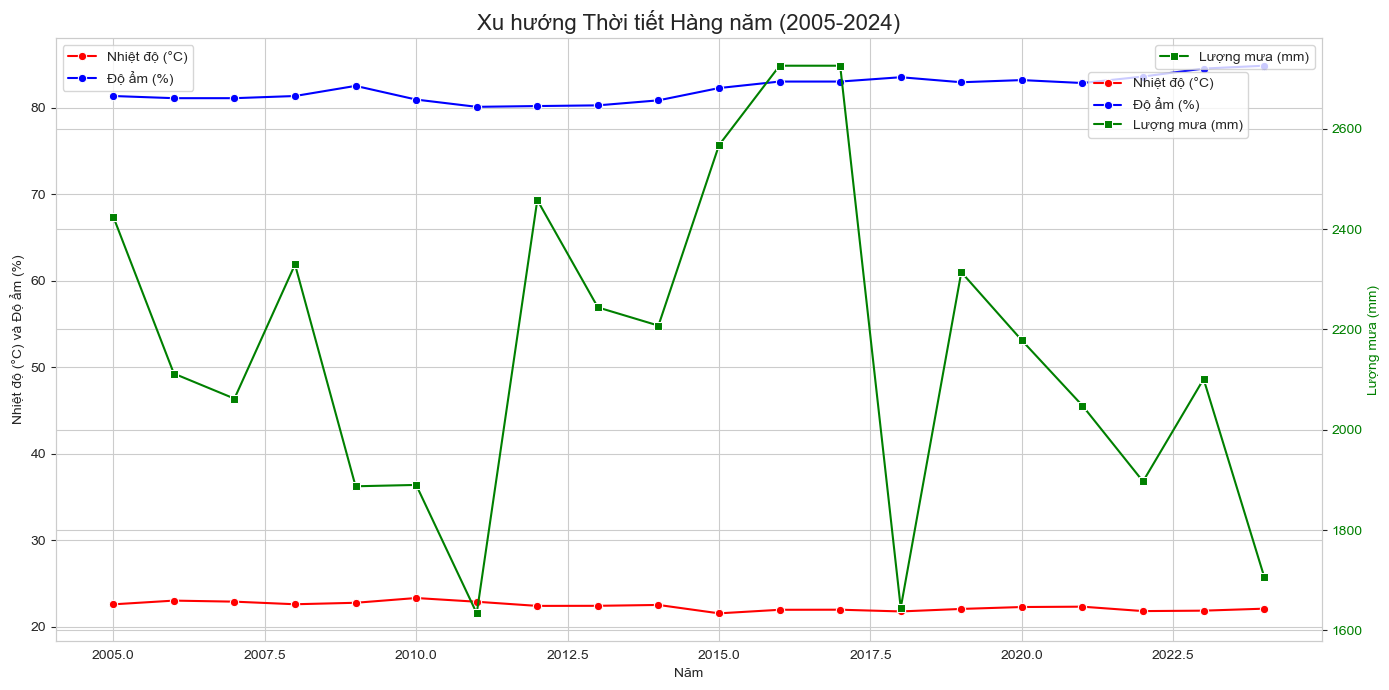

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho biểu đồ đẹp hơn
sns.set_style("whitegrid")

# Tạo Figure và Axes cho biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 7))

# Vẽ biểu đồ đường cho Nhiệt độ (trục y bên trái)
sns.lineplot(data=df_weather, x='year', y='temperature', ax=ax1, color='red', marker='o', label='Nhiệt độ (°C)')

# Vẽ biểu đồ đường cho Độ ẩm (trục y bên trái)
sns.lineplot(data=df_weather, x='year', y='humidity', ax=ax1, color='blue', marker='o', label='Độ ẩm (%)')
ax1.set_ylabel('Nhiệt độ (°C) và Độ ẩm (%)')
ax1.set_xlabel('Năm')

# Tạo một trục y thứ hai chia sẻ cùng một trục x
ax2 = ax1.twinx()

# Vẽ biểu đồ đường cho Lượng mưa (trục y bên phải)
sns.lineplot(data=df_weather, x='year', y='rain', ax=ax2, color='green', marker='s', label='Lượng mưa (mm)')
ax2.set_ylabel('Lượng mưa (mm)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Thêm tiêu đề và hiển thị chú giải
plt.title('Xu hướng Thời tiết Hàng năm (2005-2024)', fontsize=16)
fig.tight_layout() # Đảm bảo các nhãn không bị chồng chéo
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.show()

### Truy xuất bảng coffee_export

In [19]:
cursor.execute("select * from coffee_export")
result = cursor.fetchall()
df_coffee_export = pd.DataFrame(result)
df_coffee_export

,id,year,export_value_million_usd,price_world_usd_per_ton,price_vn_usd_per_ton
0,1,2005,None,1114.68,None
1,2,2006,None,1489.86,None
2,3,2007,1911.00,1910.01,1554.92
3,4,2008,2111.00,2319.18,1991.51
4,5,2009,1730.60,1643.41,1462.24
5,6,2010,1851.36,1735.72,1520.16
6,7,2011,2752.42,2408.29,2189.25
7,8,2012,3672.81,2267.30,2120.37
8,9,2013,2717.51,2074.93,2090.16
9,10,2014,3556.89,2213.86,2103.97


### Làm sạch dữ liệu

In [49]:
targets = ["export_value_million_usd", "price_vn_usd_per_ton"]
for col in targets:
    df_coffee_export[col] = pd.to_numeric(df_coffee_export[col], errors='coerce')

# Bước 2: Lặp qua từng cột để tính toán và điền giá trị
for name in targets:
    # Lấy ra các giá trị mốc từ những năm gần nhất có dữ liệu
    v2007 = df_coffee_export.loc[df_coffee_export['year'] == 2007, name].iloc[0]
    v2009 = df_coffee_export.loc[df_coffee_export['year'] == 2009, name].iloc[0]

    # Tính tốc độ tăng trưởng trung bình hàng năm (tăng trưởng kép) trong 2 năm từ 2007 đến 2009
    # Công thức: growth = (Giá trị cuối / Giá trị đầu) ^ (1 / số kỳ) - 1
    growth_rate = (v2009 / v2007)**(1/2) - 1

    # Bước 3: Ngoại suy ngược để tìm giá trị cho các năm trước đó
    # v(t-1) = v(t) / (1 + growth_rate)
    v2006 = v2007 / (1 + growth_rate)
    v2005 = v2006 / (1 + growth_rate)

    # Bước 4: Cập nhật các giá trị vừa tìm được vào DataFrame
    df_coffee_export.loc[df_coffee_export['year'] == 2006, name] = round(v2006, 2)
    df_coffee_export.loc[df_coffee_export['year'] == 2005, name] = round(v2005, 2)

# In ra 5 dòng đầu để xem kết quả
print("DataFrame sau khi điền giá trị thiếu:")
df_coffee_export


DataFrame sau khi điền giá trị thiếu:


,id,year,export_value_million_usd,price_world_usd_per_ton,price_vn_usd_per_ton
0,1,2005,2110.21,1114.68,1653.47
1,2,2006,2008.13,1489.86,1603.44
2,3,2007,1911.00,1910.01,1554.92
3,4,2008,2111.00,2319.18,1991.51
4,5,2009,1730.60,1643.41,1462.24
5,6,2010,1851.36,1735.72,1520.16
6,7,2011,2752.42,2408.29,2189.25
7,8,2012,3672.81,2267.30,2120.37
8,9,2013,2717.51,2074.93,2090.16
9,10,2014,3556.89,2213.86,2103.97


In [42]:
df_coffee_export.describe()

,id,year,export_value_million_usd,price_vn_usd_per_ton
count,20.00000,20.00000,20.000000,20.000000
mean,10.50000,2014.50000,3002.966000,2039.612500
std,5.91608,5.91608,972.256677,582.868846
min,1.00000,2005.00000,1730.600000,1462.240000
25%,5.75000,2009.75000,2110.802500,1708.475000
50%,10.50000,2014.50000,2807.360000,1979.355000
75%,15.25000,2019.25000,3541.522500,2137.590000
max,20.00000,2024.00000,5620.170000,4177.940000


Chúng ta có thể thấy được giá xuất khẩu tăng mạnh qua các năm, đạt mức cao kỷ lục vào năm 2024 (5.6 triệu USD). Độ lệch chuẩn rất lớn cho thấy sự biến động mạnh mẽ. Điều này cho thấy qua mỗi năm đều có sự tăng trưởng không những đều đặn mà còn tăng rất mạnh, hoặc có thể cũng giảm mạnh. 

Giá xuất khẩu ra thế giới bất ổn khi giá cả lên thị trường thế giới liên tục đầy biến động và khó đoán. Giá xuất khẩu thế giới chính là nguồn động lực chính khiến cho giá trị của kim ngạch tăng, khi giá xuất khẩu ra thế giới tăng thì giá trị kim ngạch cũng tăng. 

Xét về xu hướng thì giá trị kim ngạch của Việt Nam luôn đi song song so với thế giới và giá luôn thấp hơn, điều này có thể phản ánh qua nhiều khía cạnh như marketing, vận chuyển, sự khác biệt về hàng hóa sản phẩm. 

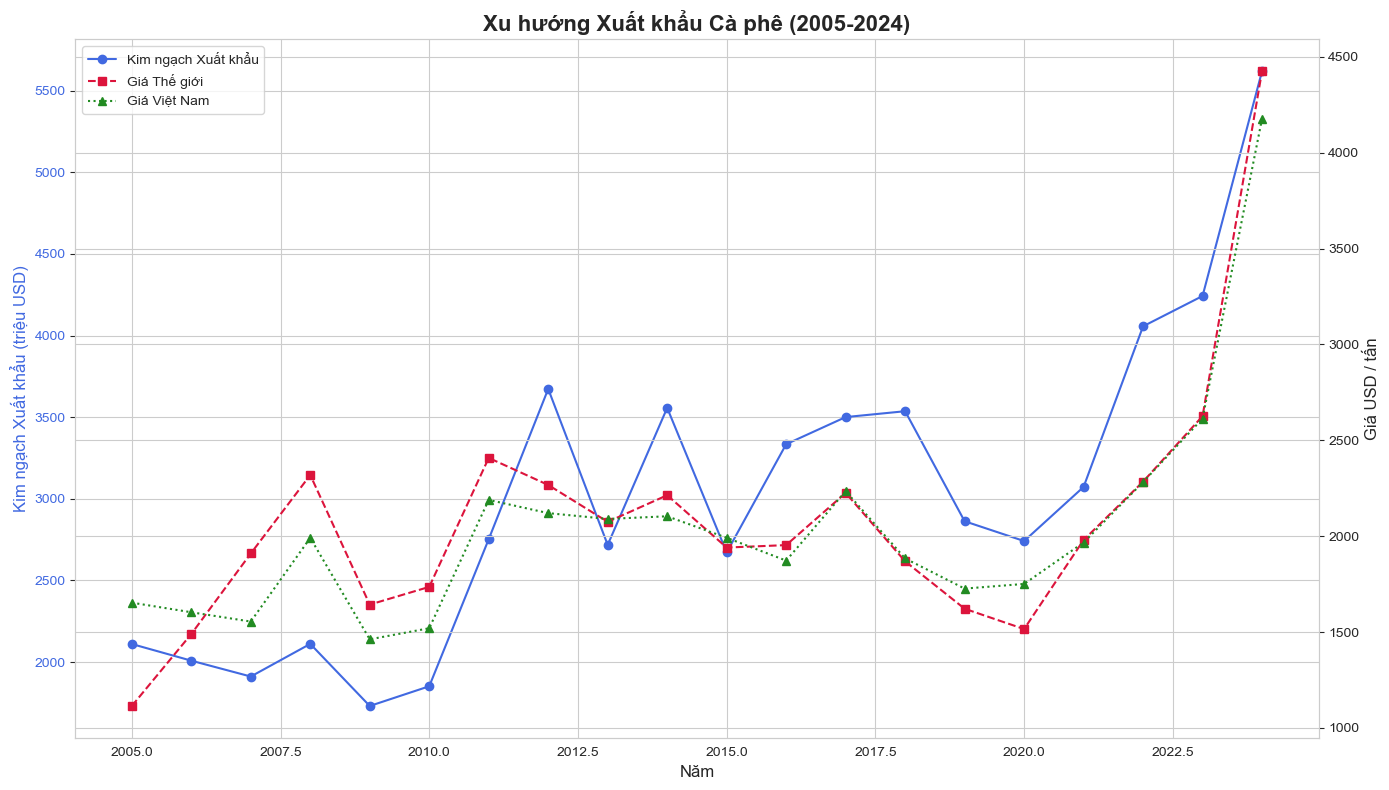

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Thiết lập style và kích thước cho biểu đồ
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 8))

# 2. Vẽ Kim ngạch xuất khẩu (trục Y bên trái)
color_export = 'royalblue'
ax1.set_xlabel('Năm', fontsize=12)
ax1.set_ylabel('Kim ngạch Xuất khẩu (triệu USD)', color=color_export, fontsize=12)
ax1.plot(df_coffee_export.year, df_coffee_export.export_value_million_usd, color=color_export, marker='o', linestyle='-', label='Kim ngạch Xuất khẩu')
ax1.tick_params(axis='y', labelcolor=color_export)

# 3. Tạo trục Y thứ hai và vẽ giá cà phê
ax2 = ax1.twinx()  # Tạo trục y thứ hai dùng chung trục x
color_world = 'crimson'
color_vn = 'forestgreen'
ax2.set_ylabel('Giá USD / tấn', fontsize=12)
ax2.plot(df_coffee_export.year, df_coffee_export.price_world_usd_per_ton, color=color_world, marker='s', linestyle='--', label='Giá Thế giới')
ax2.plot(df_coffee_export.year, df_coffee_export.price_vn_usd_per_ton, color=color_vn, marker='^', linestyle=':', label='Giá Việt Nam')
ax2.tick_params(axis='y')

# 4. Hoàn thiện biểu đồ
plt.title('Xu hướng Xuất khẩu Cà phê (2005-2024)', fontsize=16, weight='bold')
fig.tight_layout()  # Tự động điều chỉnh các thành phần cho vừa vặn

# 5. Tạo một chú giải (legend) chung cho cả 2 trục
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

### Truy xuất dữ liệu market_trade

In [54]:
cursor.execute("select * from market_trade")
result = cursor.fetchall()
df_market_trade = pd.DataFrame(result)
df_market_trade

,id,importer,year,trade_value_million_usd,quantity_tons
0,1,China,2005,7.32,9931.36
1,2,China,2006,17.96,14491.60
2,3,China,2007,24.14,14927.20
3,4,China,2008,32.50,15601.20
4,5,China,2009,27.51,17130.80
5,6,China,2010,36.03,23635.70
6,7,China,2011,74.70,32518.60
7,8,China,2012,86.70,39561.00
8,9,China,2013,57.88,27299.50
9,10,China,2014,92.06,46377.10


In [56]:
col_to_convert = ['trade_value_million_usd','quantity_tons']
for col in col_to_convert: 
    df_market_trade[col]= pd.to_numeric(df_market_trade[col], errors= 'coerce')
df_market_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       57 non-null     int64  
 1   importer                 57 non-null     object 
 2   year                     57 non-null     int64  
 3   trade_value_million_usd  57 non-null     float64
 4   quantity_tons            57 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ KB


In [57]:
df_market_trade.describe()

,id,year,trade_value_million_usd,quantity_tons
count,57.000000,57.000000,57.000000,57.00000
mean,29.000000,2014.000000,535.536491,272696.05193
std,16.598193,5.525913,534.437919,260681.88952
min,1.000000,2005.000000,7.320000,9931.36000
25%,15.000000,2009.000000,57.600000,27299.50000
50%,29.000000,2014.000000,329.550000,167030.00000
75%,43.000000,2019.000000,983.430000,543943.00000
max,57.000000,2023.000000,1624.660000,758442.00000


Nhận thấy rằng EU chính là thị trường xuất khẩu lớn nhất của Việt Nam, cả về sản lượng lẫn giá trị. Sản lượng xuất khẩu cà phê sang EU giao động từ 400-700 nghìn tấn, gấp rất nhiều lần so với Mỹ và Trung Quốc cộng lại.

Đối với Trung Quốc thì là một thị trường đầy tiềm năng, khi sản lượng xuất khẩu sang Trung Quốc ngày càng tăng, ngược lại so với EU - nơi mà thị trường đang bão hòa. 

Đối với Mỹ thì đây là thị trường lớn thứ 2, Hoa kỳ là một khách hàng quan trọng và lâu đời. Sản lượng cà phê nhập khẩu từ Việt Nam luôn giữ ở mức cao ổn định và cao đáng kể, thường là trên 100 nghìn tấn. 

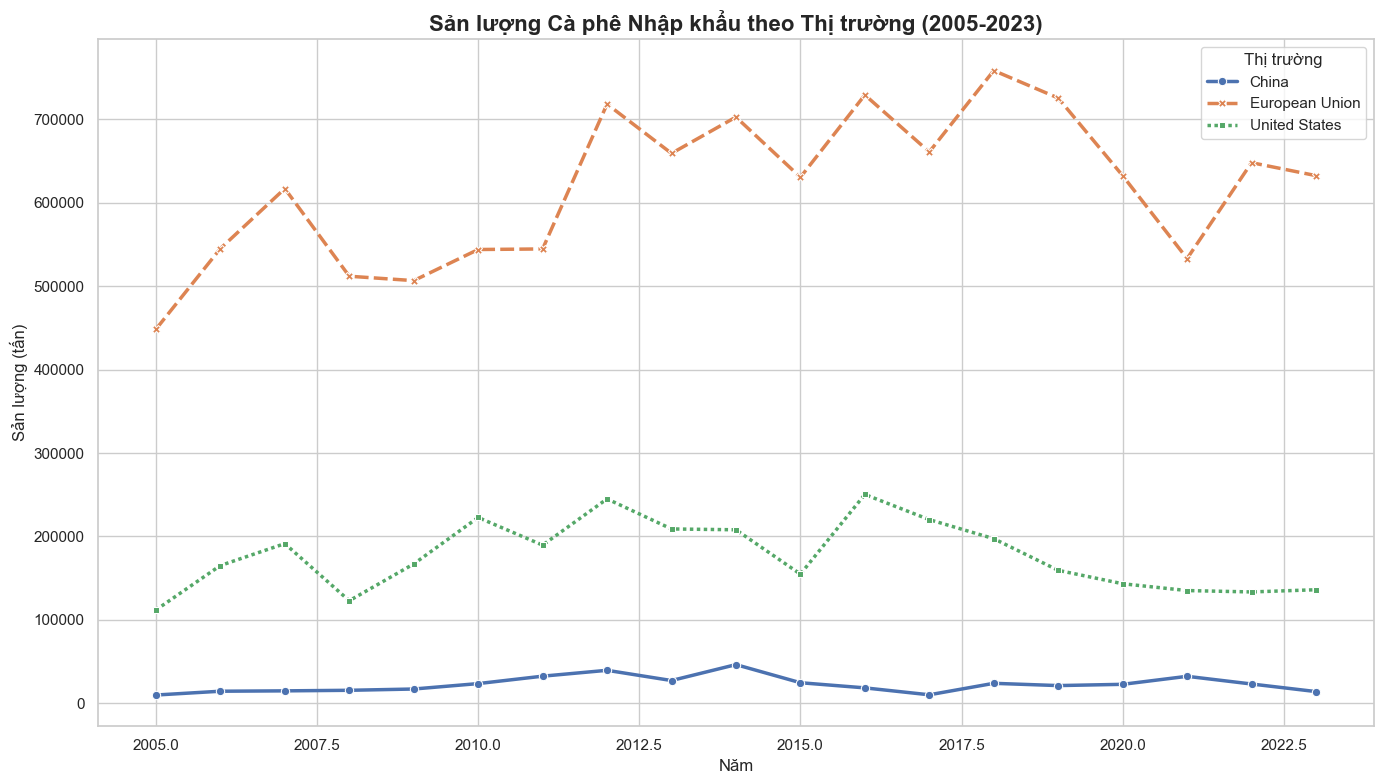

In [60]:
# 1. Thiết lập style và kích thước
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# 2. Vẽ biểu đồ đường
ax = sns.lineplot(
    data=df_market_trade,
    x='year',
    y='quantity_tons',
    hue='importer',  # Tự động vẽ 3 đường cho 3 thị trường
    style='importer', # Dùng kiểu đường khác nhau
    markers=True,    # Đánh dấu các điểm dữ liệu
    lw=2.5           # Độ dày của đường
)


# 4. Thêm tiêu đề và nhãn
plt.title('Sản lượng Cà phê Nhập khẩu theo Thị trường (2005-2023)', fontsize=16, weight='bold')
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Sản lượng (tấn)', fontsize=12)
plt.legend(title='Thị trường')

# 5. Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### Truy xuất biểu đồ Production

In [62]:
cursor.execute("select * from production")
result = cursor.fetchall()
df_production = pd.DataFrame(result)
df_production

,id,year,area_thousand_ha,output_tons,export_tons
0,1,2005,497.4,831000.00,None
1,2,2006,497.0,985300.00,None
2,3,2007,509.3,1251000.00,1229000.00
3,4,2008,530.9,1055811.00,1060000.00
4,5,2009,538.5,1057540.00,1183523.00
5,6,2010,554.8,1105700.00,1217868.00
6,7,2011,586.2,1276506.00,1257246.00
7,8,2012,623.0,1260463.00,1732156.00
8,9,2013,637.0,1326688.00,1300146.00
9,10,2014,641.2,1406469.00,1690564.00


In [65]:
targets = ['export_tons']
for col in targets:
    df_production[col] = pd.to_numeric(df_production[col], errors='coerce')
for name in targets:
    # Lấy ra các giá trị mốc từ những năm gần nhất có dữ liệu
    v2007 = df_production.loc[df_production['year'] == 2007, name].iloc[0]
    v2009 = df_production.loc[df_production['year'] == 2009, name].iloc[0]

    # Tính tốc độ tăng trưởng trung bình hàng năm (tăng trưởng kép) trong 2 năm từ 2007 đến 2009
    # Công thức: growth = (Giá trị cuối / Giá trị đầu) ^ (1 / số kỳ) - 1
    growth_rate = (v2009 / v2007)**(1/2) - 1

    # Bước 3: Ngoại suy ngược để tìm giá trị cho các năm trước đó
    # v(t-1) = v(t) / (1 + growth_rate)
    v2006 = v2007 / (1 + growth_rate)
    v2005 = v2006 / (1 + growth_rate)

    # Bước 4: Cập nhật các giá trị vừa tìm được vào DataFrame
    df_production.loc[df_production['year'] == 2006, name] = round(v2006, 2)
    df_production.loc[df_production['year'] == 2005, name] = round(v2005, 2)

# In ra 5 dòng đầu để xem kết quả
print("DataFrame sau khi điền giá trị thiếu:")
df_production


DataFrame sau khi điền giá trị thiếu:


,id,year,area_thousand_ha,output_tons,export_tons
0,1,2005,497.4,831000.00,1276224.46
1,2,2006,497.0,985300.00,1252389.66
2,3,2007,509.3,1251000.00,1229000.00
3,4,2008,530.9,1055811.00,1060000.00
4,5,2009,538.5,1057540.00,1183523.00
5,6,2010,554.8,1105700.00,1217868.00
6,7,2011,586.2,1276506.00,1257246.00
7,8,2012,623.0,1260463.00,1732156.00
8,9,2013,637.0,1326688.00,1300146.00
9,10,2014,641.2,1406469.00,1690564.00


Nhìn thấy sản lượng và diện tích của cà phê tăng trưởng rất nhiều. Điều này dễ dàng nhận thấy khi diện tích tăng thì sản lượng sẽ tăng. 

Số liệu cho thấy tỷ lệ rất lớn sản lượng cà phê được sử dụng với mục đích là đi xuất khẩu. Nhìn từ số liệu cho thấy với một số năm thì sản lượng xuất khẩu còn lớn hơn sản lượng sản xuất, điều này phản ánh được thực tế rằng có thể là lượng cà phê còn tồn kho từ vụ thu hoạch từ năm trước.

cả 3 chỉ số đều tăng trưởng qua thời gian, cho thấy sự ổn định về lâu dài, cam kết cho sự đầu tư và phát triển. Đây cũng chính là một ngành công nghiệp trọng điểm của nước ta, đảm bảo sự phát triển lâu dài và bền vững.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19312\649924672.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_production['output_tons'].fillna(method='ffill', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19312\649924672.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_production['output_tons'].fillna(method='ffill', inplace=True)


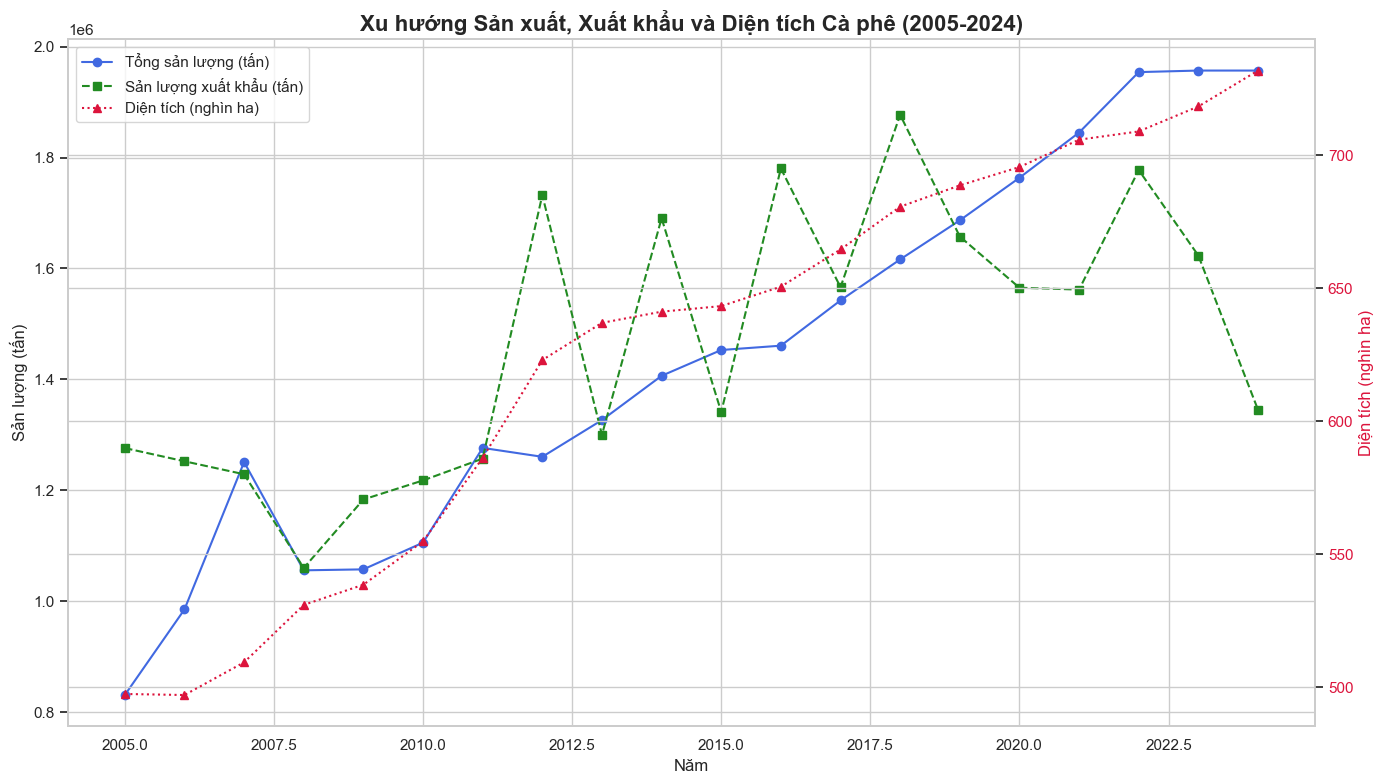

In [66]:
# Điền giá trị thiếu để vẽ (tạm thời dùng ffill cho mục đích trực quan)
df_production['output_tons'].fillna(method='ffill', inplace=True)

# 1. Thiết lập style và kích thước
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 8))


# 3. Vẽ Sản lượng và Xuất khẩu (trục Y bên trái)
ax1.set_xlabel('Năm', fontsize=12)
ax1.set_ylabel('Sản lượng (tấn)', fontsize=12)
ax1.plot(df_production.year, df_production.output_tons, color='royalblue', marker='o', linestyle='-', label='Tổng sản lượng (tấn)')
ax1.plot(df_production.year, df_production.export_tons, color='forestgreen', marker='s', linestyle='--', label='Sản lượng xuất khẩu (tấn)')

# 4. Tạo trục Y thứ hai và vẽ Diện tích
ax2 = ax1.twinx()
ax2.set_ylabel('Diện tích (nghìn ha)', color='crimson', fontsize=12)
ax2.plot(df_production.year, df_production.area_thousand_ha, color='crimson', marker='^', linestyle=':', label='Diện tích (nghìn ha)')
ax2.tick_params(axis='y', labelcolor='crimson')

# 5. Hoàn thiện biểu đồ
plt.title('Xu hướng Sản xuất, Xuất khẩu và Diện tích Cà phê (2005-2024)', fontsize=16, weight='bold')
fig.tight_layout()

# 6. Tạo chú giải chung
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()
